# Linear Regression on House Prices

## 1. Problem Statement

Find the expected house price in given locality

## 2. Data Loading

### 2.1 Import package

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics

### 2.2 Import dataset

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/PrabhakarAlagarsamy/machine-learning/master/Data/house-prices/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/PrabhakarAlagarsamy/machine-learning/master/Data/house-prices/test.csv')

## 3. Preprocessing

### 3.1 Number of rows and columns

In [3]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


### 3.2 Details of dataset

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 3.3 Find null values

In [6]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [7]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

### 3.4 Drop columns

In [8]:
train.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'],axis=1,inplace=True)
test.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'],axis=1,inplace=True)

### 3.5 Standardise data

In [9]:
train.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
test.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [11]:
# train dataset
train['MasVnrType'].fillna(train['MasVnrType'].mode()[0],inplace=True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(),inplace=True)
# test dataset
test['MSZoning'].fillna(test['MSZoning'].mode()[0],inplace=True)
test['Utilities'].fillna(test['Utilities'].mode()[0],inplace=True)
test['Exterior1st'].fillna(test['Exterior1st'].mode()[0],inplace=True)
test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0],inplace=True)
test['MasVnrType'].fillna(test['MasVnrType'].mode()[0],inplace=True)
test['MasVnrArea'].fillna(test['MasVnrArea'].mean(),inplace=True)
test['KitchenQual'].fillna(test['KitchenQual'].mode()[0],inplace=True)
test['Functional'].fillna(test['Functional'].mode()[0],inplace=True)
test['GarageCars'].fillna(test['GarageCars'].mean(),inplace=True)
test['GarageArea'].fillna(test['GarageArea'].mean(),inplace=True)
test['SaleType'].fillna(test['SaleType'].mode()[0],inplace=True)

In [12]:
train.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
                 ..
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageCars        0
GarageArea        0
PavedDrive        0
WoodDeckSF        0


In [13]:
train['BsmtQual'].fillna(train['BsmtQual'].mode()[0],inplace=True)
train['BsmtCond'].fillna(train['BsmtCond'].mode()[0],inplace=True)
train['Electrical'].fillna(train['Electrical'].mode()[0],inplace=True)

In [14]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
                ..
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

In [15]:
test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         44
BsmtCond         45
                 ..
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageCars        0
GarageArea        0
PavedDrive        0


In [16]:
test['BsmtQual'].fillna(test['BsmtQual'].mode()[0],inplace=True)
test['BsmtCond'].fillna(test['BsmtCond'].mode()[0],inplace=True)
test['BsmtFullBath'].fillna(test['BsmtFullBath'].mean(),inplace=True)
test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mean(),inplace=True)

In [17]:
test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
                ..
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [18]:
train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0],inplace=True)
train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0],inplace=True)
train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0],inplace=True)

In [19]:
test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0],inplace=True)
test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0],inplace=True)
test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0],inplace=True)
test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean(),inplace=True)
test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean(),inplace=True)
test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean(),inplace=True)
test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean(),inplace=True)

In [20]:
qualitative = [i for i in train.columns if train.dtypes[i]=='object']
quantitative = [i for i in train.columns if train.dtypes[i]!='object']               

In [21]:
qualitative

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [22]:
quantitative

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

## 4. Visualization

### 4.1 Pait plot

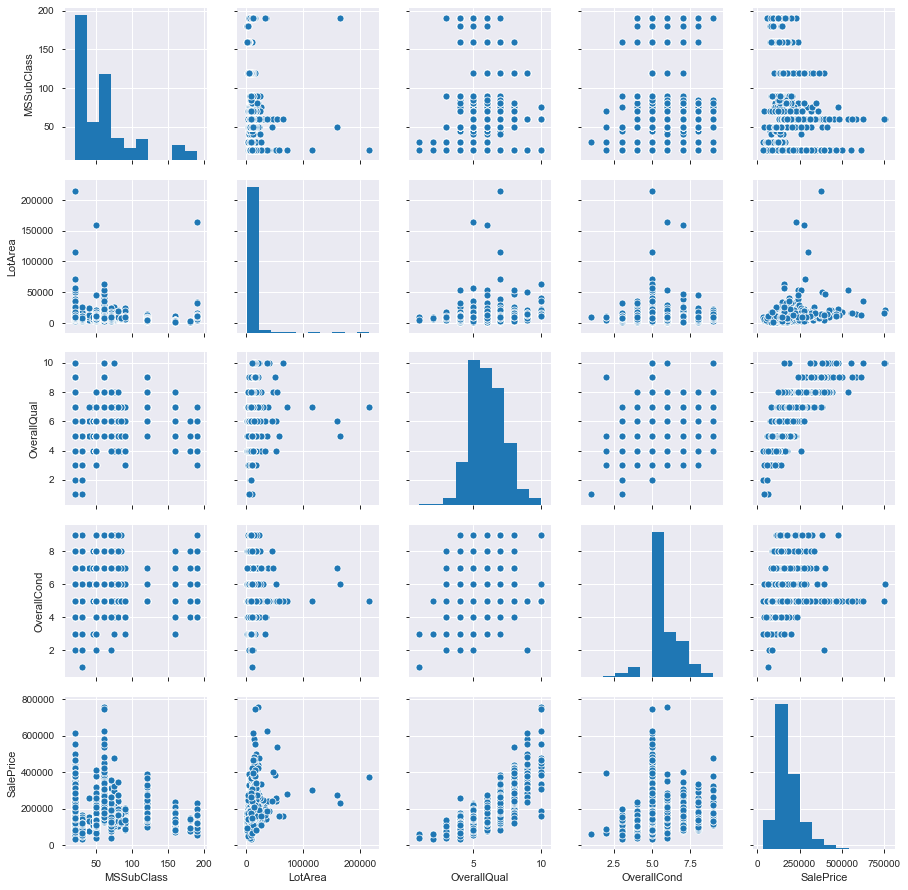

In [23]:
sns.pairplot(train[['MSSubClass','LotArea','OverallQual','OverallCond','SalePrice']],vars=['MSSubClass','LotArea','OverallQual','OverallCond','SalePrice'])

- __SalePrice__ increase with __OverallQual__
- Most of the houses priced below __250000__

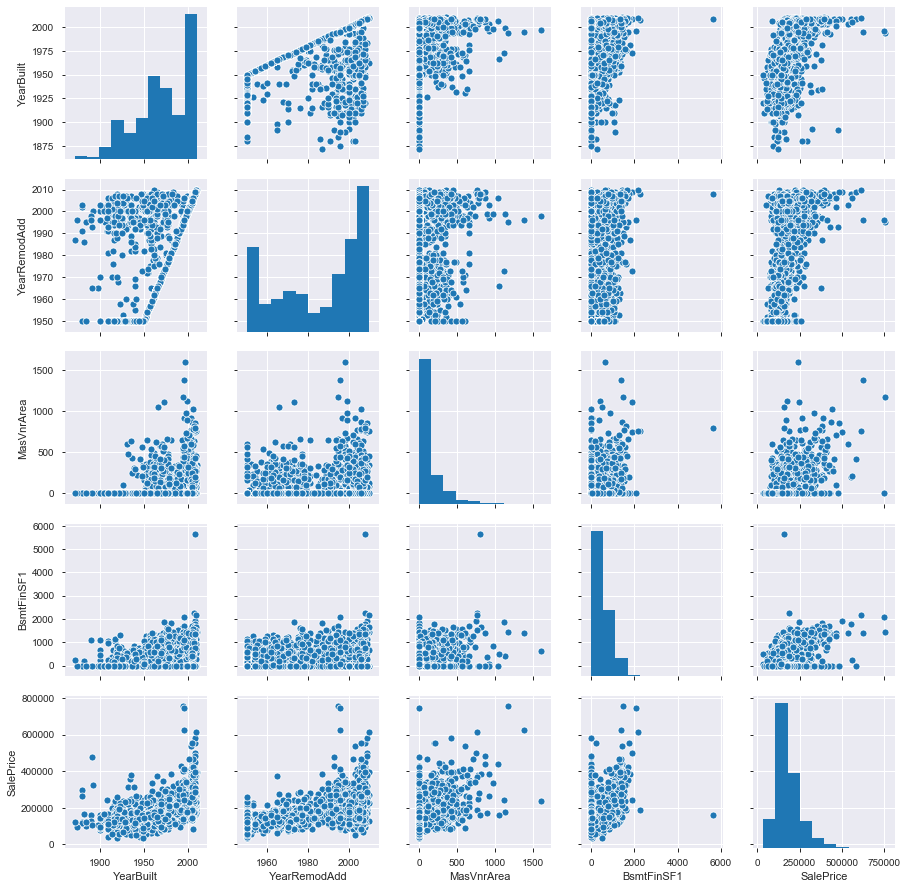

In [24]:
sns.pairplot(train[['YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','SalePrice']],vars=['YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','SalePrice'])

- __YearBuilt__,__YearRemodAdd__ having impact on increase in __SalePrice__

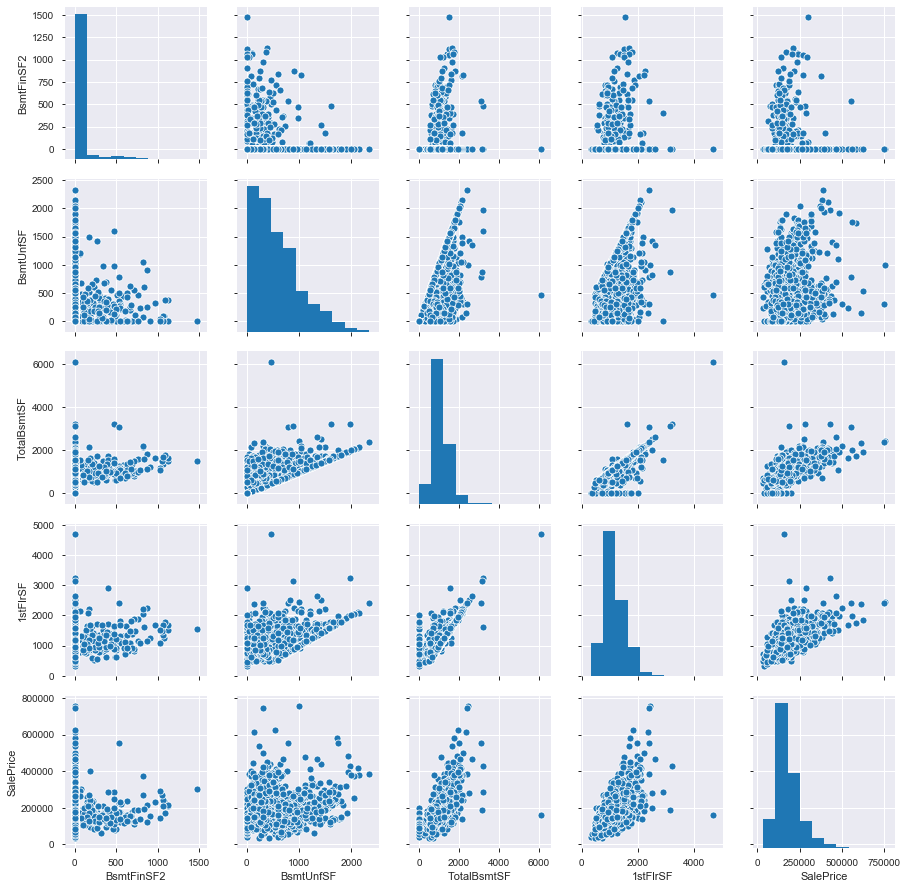

In [25]:
sns.pairplot(train[['BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','SalePrice']],vars=['BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','SalePrice'])

- __TotalBsmtSF__, __1stFlrSF__ having impact in increase in __SalePrice__

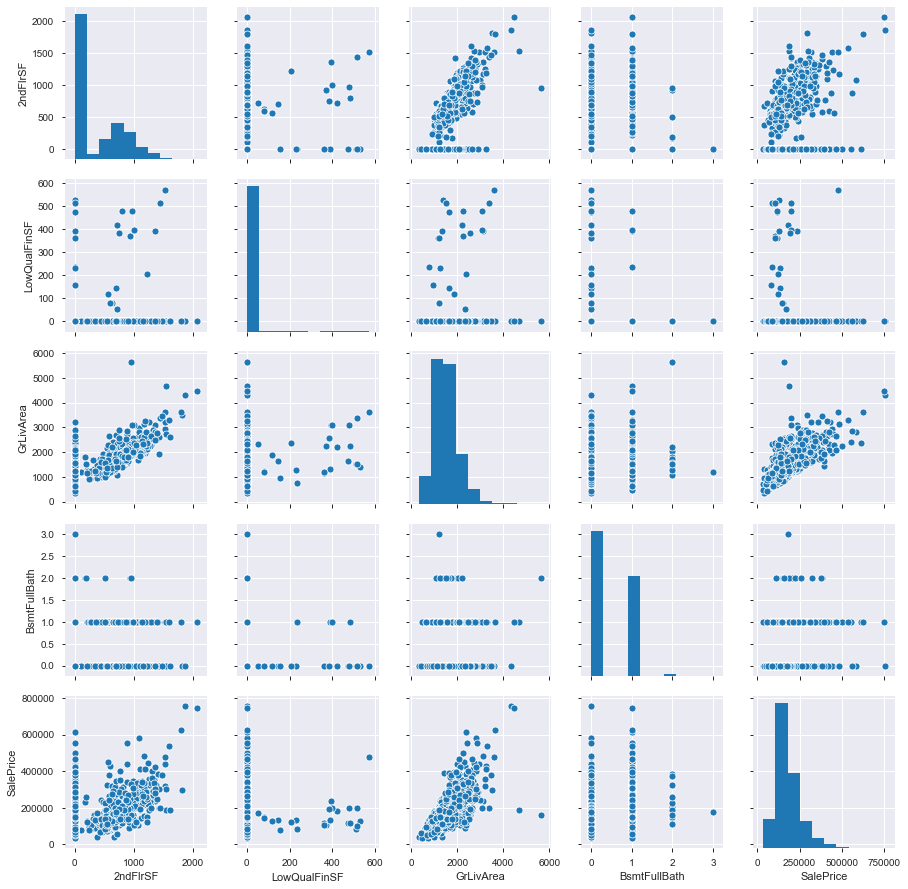

In [26]:
sns.pairplot(train[['2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','SalePrice']],vars=['2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','SalePrice'])

- __2ndFlrSF__ and __GrLivArea__ have impact in increase in __SalePrice__

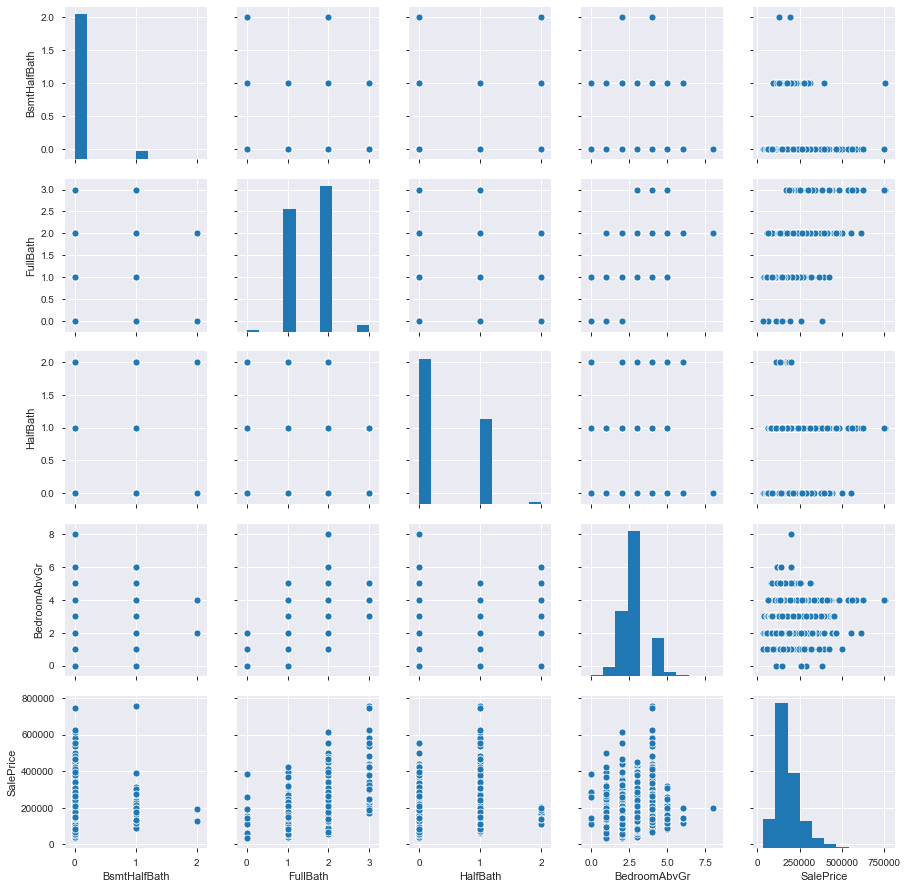

In [27]:
sns.pairplot(train[['BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','SalePrice']],vars=['BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','SalePrice'])

- __FullBath__ has impact in increase in __SalePrice__

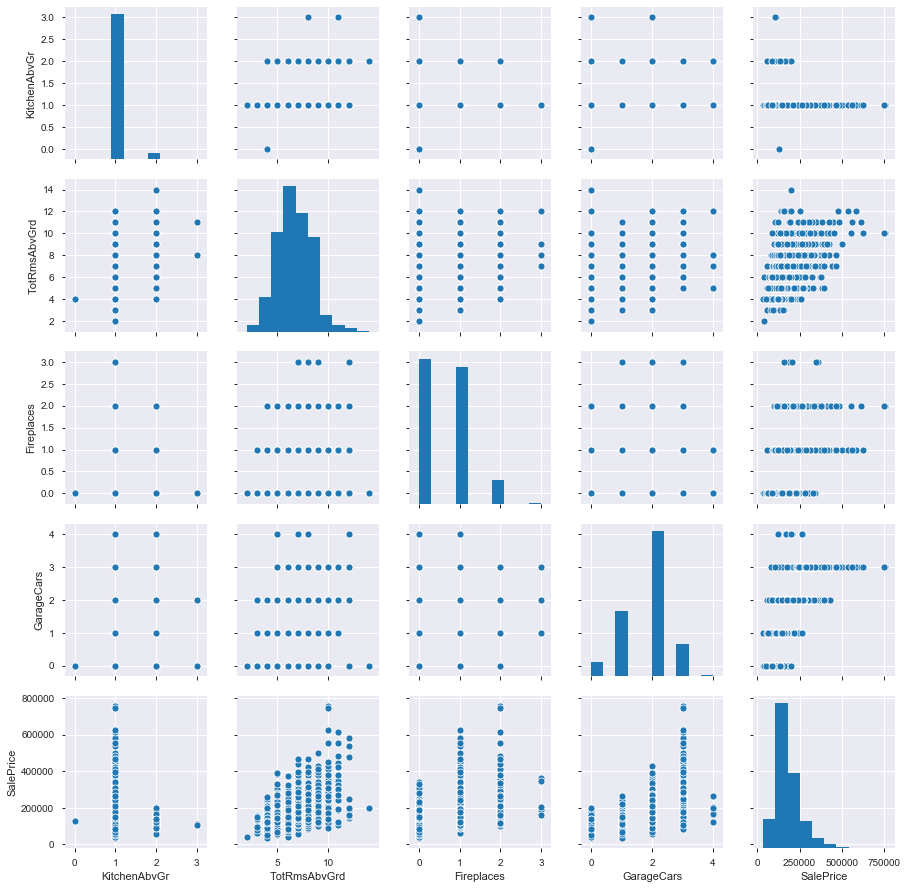

In [28]:
sns.pairplot(train[['KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','SalePrice']],vars=['KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','SalePrice'])

- __TotRmsAbvGrd__, __Fireplaces__, and __GarageCars__ have impact in __SalePrice__

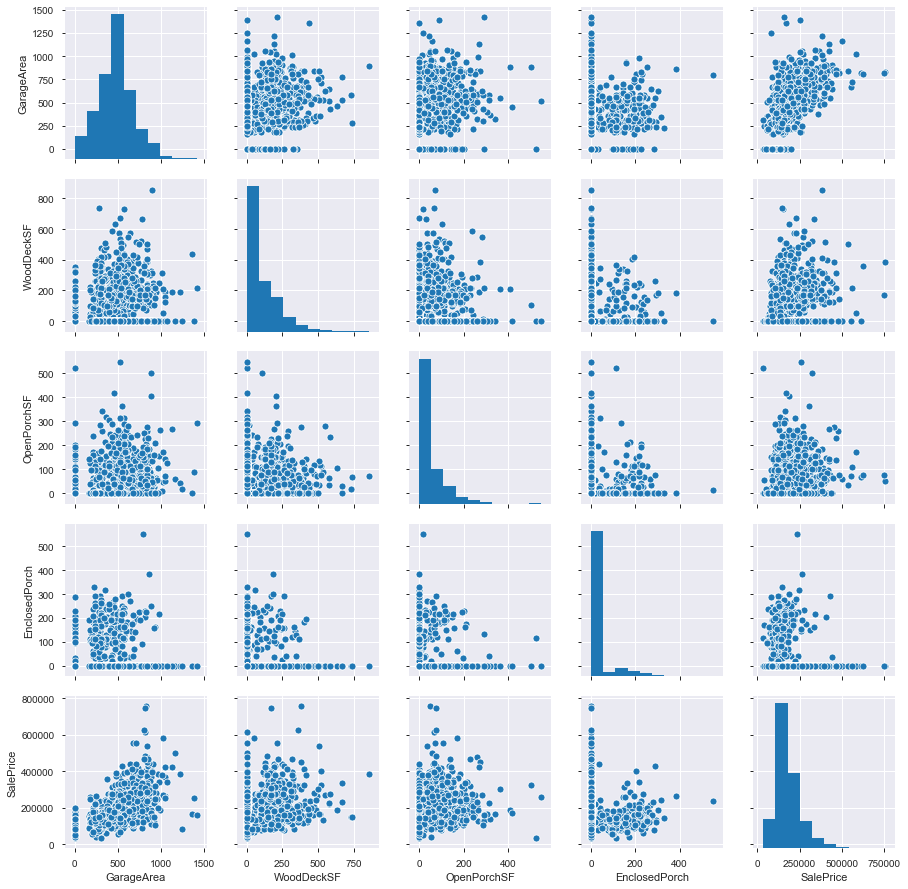

In [29]:
sns.pairplot(train[['GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','SalePrice']],vars=['GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','SalePrice'])

- __GarageArea__, __WoodDeckSF__ and __OpenPorchSF__ have impact is __SalePrice__

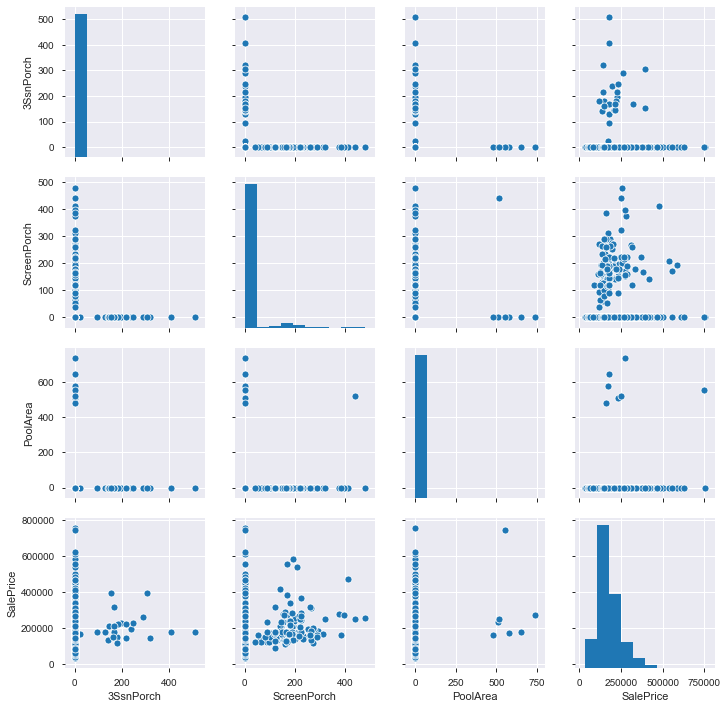

In [30]:
sns.pairplot(train[['3SsnPorch','ScreenPorch','PoolArea','SalePrice']],vars=['3SsnPorch','ScreenPorch','PoolArea','SalePrice'])

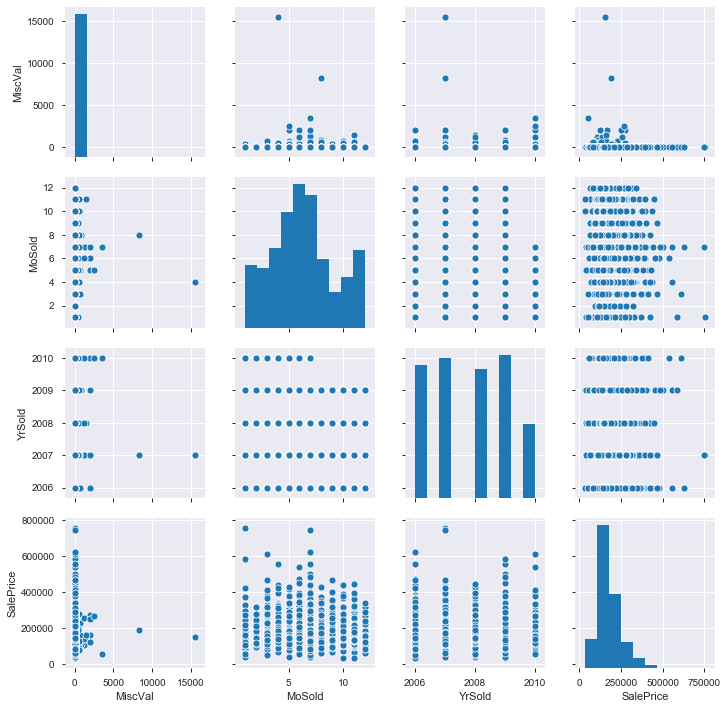

In [31]:
sns.pairplot(train[['MiscVal','MoSold','YrSold','SalePrice']],vars=['MiscVal','MoSold','YrSold','SalePrice'])

### 4.2 Box plot

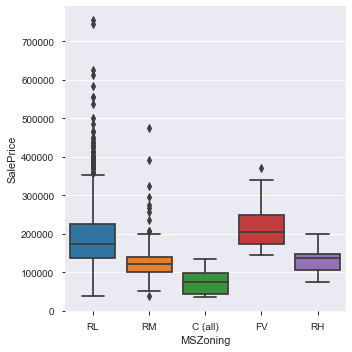

In [32]:
sns.catplot(x="MSZoning", y="SalePrice", kind="box", data=train);

- There are some __outliers__ in RL, RM and FV Zone

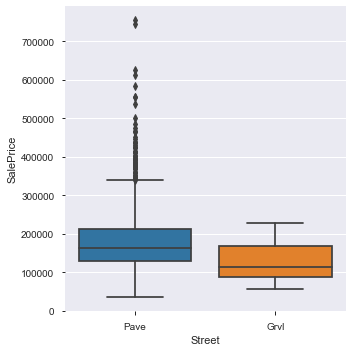

In [33]:
sns.catplot(x="Street", y="SalePrice", kind="box", data=train);

- Street with __Pave__ has more __SalePrice__

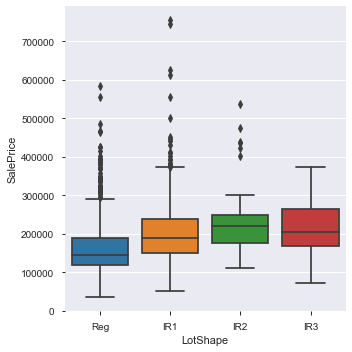

In [34]:
sns.catplot(x="LotShape", y="SalePrice", kind="box", data=train);

- There are more __outliers__ in __Reg, IR1, IR2__ LotShape

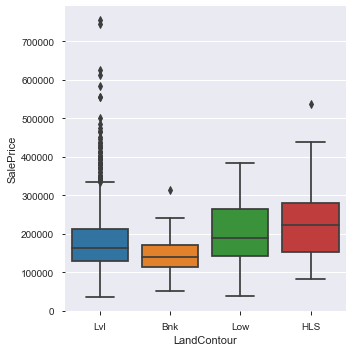

In [35]:
sns.catplot(x="LandContour", y="SalePrice", kind="box", data=train);

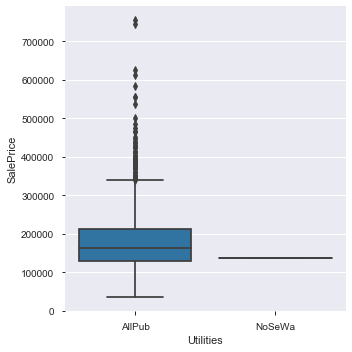

In [36]:
sns.catplot(x="Utilities", y="SalePrice", kind="box", data=train);

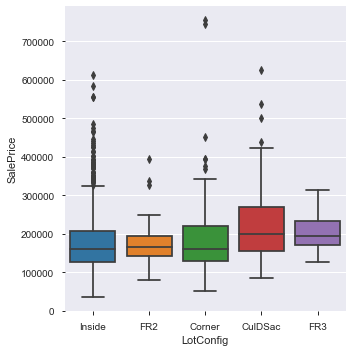

In [37]:
sns.catplot(x="LotConfig", y="SalePrice", kind="box", data=train);

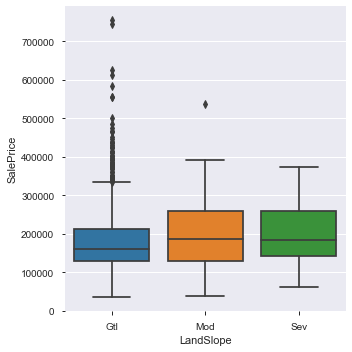

In [38]:
sns.catplot(x="LandSlope", y="SalePrice", kind="box", data=train);

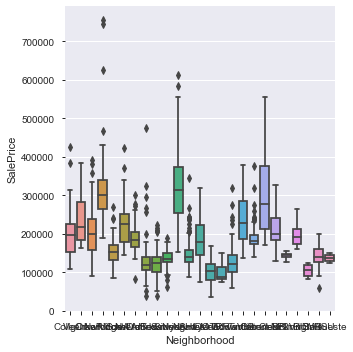

In [39]:
sns.catplot(x="Neighborhood", y="SalePrice", kind="box", data=train);

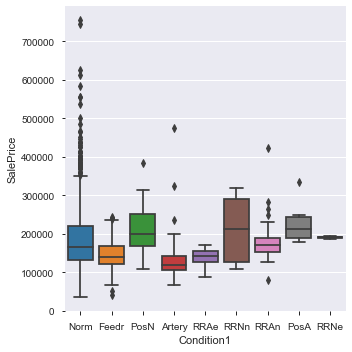

In [40]:
sns.catplot(x="Condition1", y="SalePrice", kind="box", data=train);

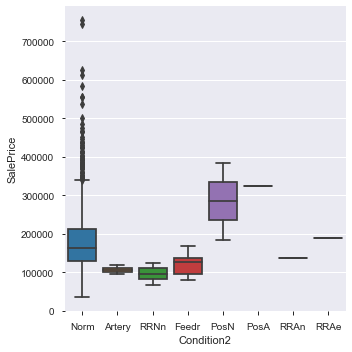

In [41]:
sns.catplot(x="Condition2", y="SalePrice", kind="box", data=train);

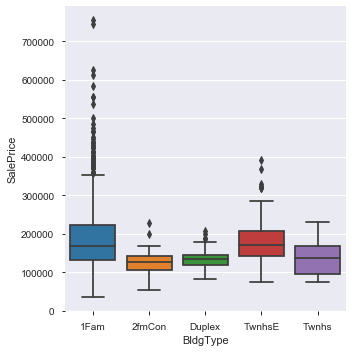

In [42]:
sns.catplot(x="BldgType", y="SalePrice", kind="box", data=train);

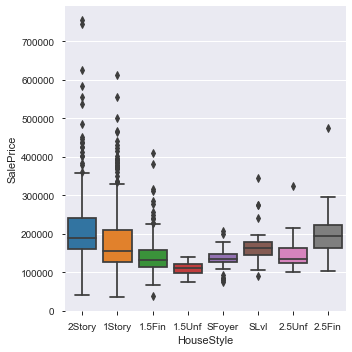

In [43]:
sns.catplot(x="HouseStyle", y="SalePrice", kind="box", data=train);

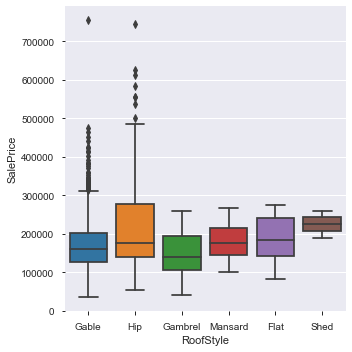

In [44]:
sns.catplot(x="RoofStyle", y="SalePrice", kind="box", data=train);

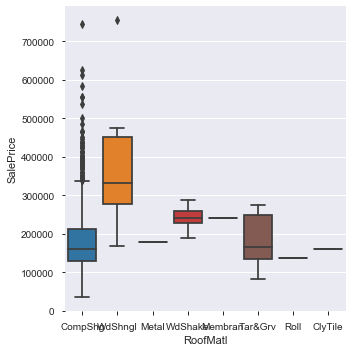

In [45]:
sns.catplot(x="RoofMatl", y="SalePrice", kind="box", data=train);

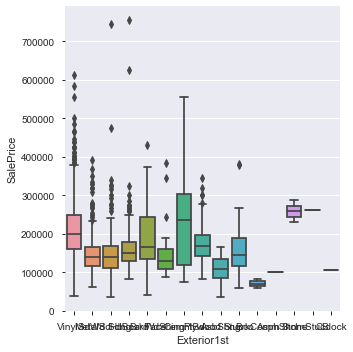

In [46]:
sns.catplot(x="Exterior1st", y="SalePrice", kind="box", data=train);

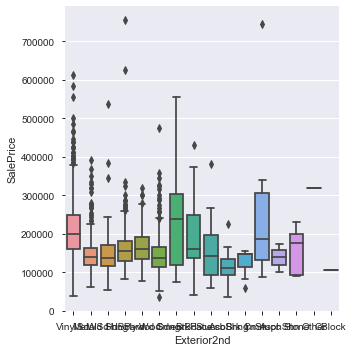

In [47]:
sns.catplot(x="Exterior2nd", y="SalePrice", kind="box", data=train);

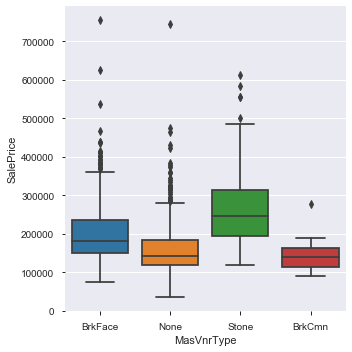

In [48]:
sns.catplot(x="MasVnrType", y="SalePrice", kind="box", data=train);

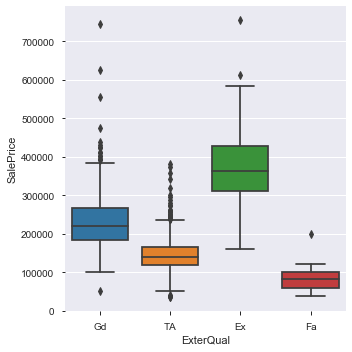

In [49]:
sns.catplot(x="ExterQual", y="SalePrice", kind="box", data=train);

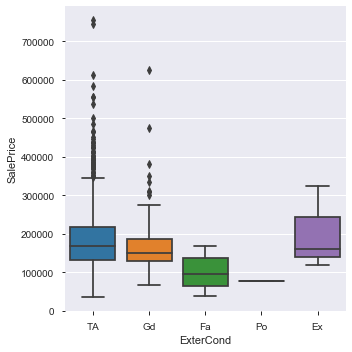

In [50]:
sns.catplot(x="ExterCond", y="SalePrice", kind="box", data=train);

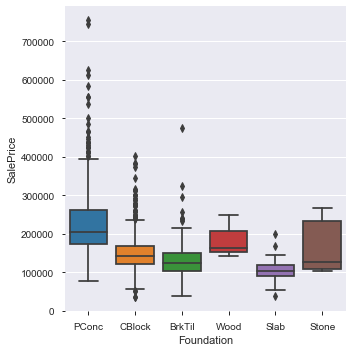

In [51]:
sns.catplot(x="Foundation", y="SalePrice", kind="box", data=train);

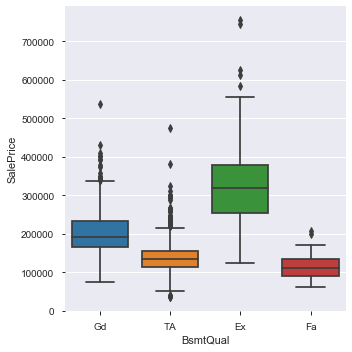

In [52]:
sns.catplot(x="BsmtQual", y="SalePrice", kind="box", data=train);

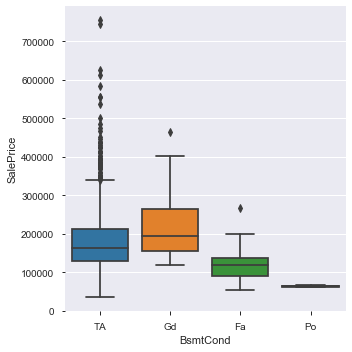

In [53]:
sns.catplot(x="BsmtCond", y="SalePrice", kind="box", data=train);

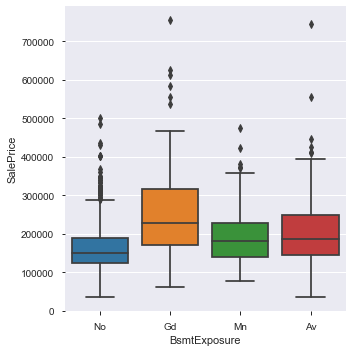

In [54]:
sns.catplot(x="BsmtExposure", y="SalePrice", kind="box", data=train);

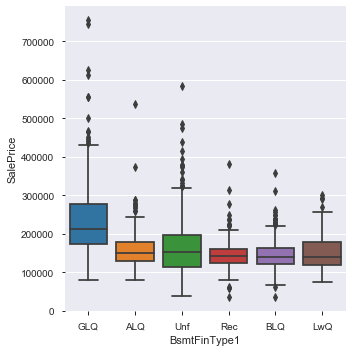

In [55]:
sns.catplot(x="BsmtFinType1", y="SalePrice", kind="box", data=train);

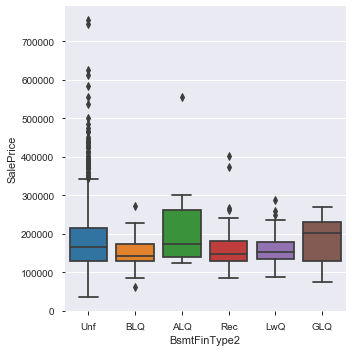

In [56]:
sns.catplot(x="BsmtFinType2", y="SalePrice", kind="box", data=train);

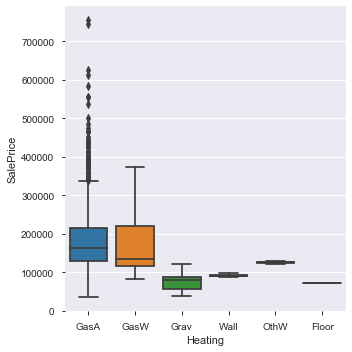

In [57]:
sns.catplot(x="Heating", y="SalePrice", kind="box", data=train);

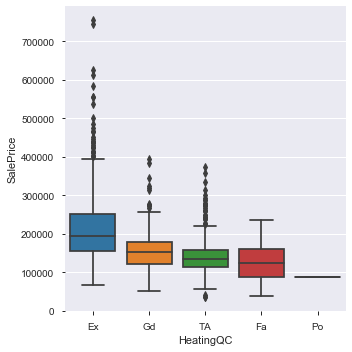

In [58]:
sns.catplot(x="HeatingQC", y="SalePrice", kind="box", data=train);

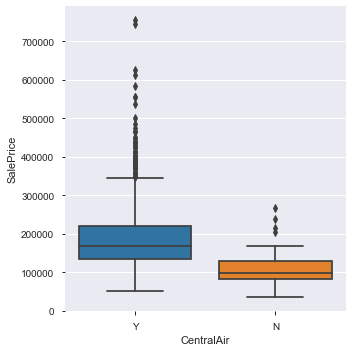

In [59]:
sns.catplot(x="CentralAir", y="SalePrice", kind="box", data=train);

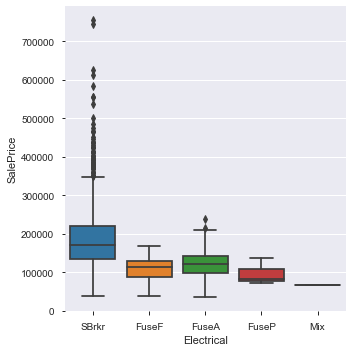

In [60]:
sns.catplot(x="Electrical", y="SalePrice", kind="box", data=train);

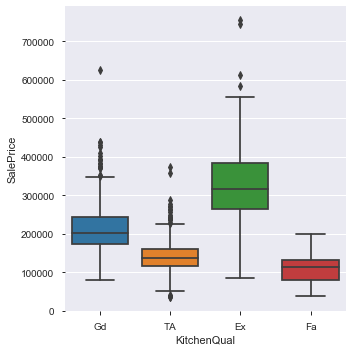

In [61]:
sns.catplot(x="KitchenQual", y="SalePrice", kind="box", data=train);

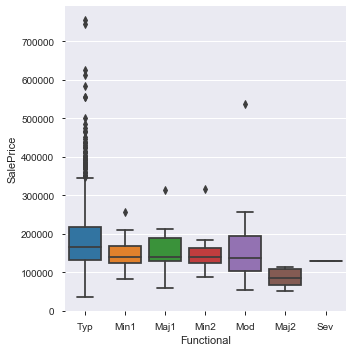

In [62]:
sns.catplot(x="Functional", y="SalePrice", kind="box", data=train);

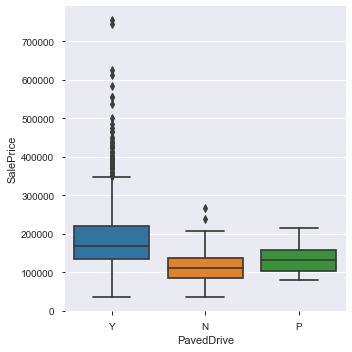

In [63]:
sns.catplot(x="PavedDrive", y="SalePrice", kind="box", data=train);

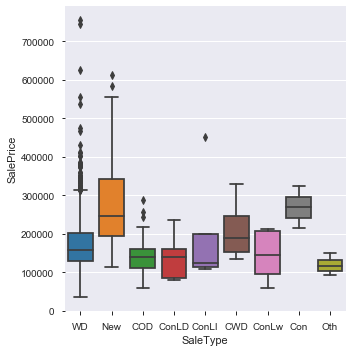

In [64]:
sns.catplot(x="SaleType", y="SalePrice", kind="box", data=train);

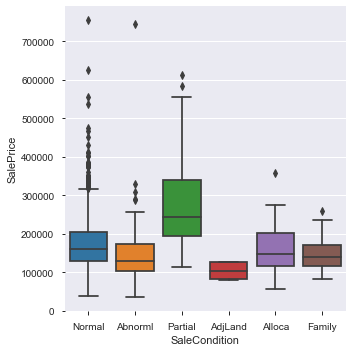

In [65]:
sns.catplot(x="SaleCondition", y="SalePrice", kind="box", data=train);

- __Quantify__ the __qualitative__ column

In [66]:
UtilitiesRep = {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1}
LandSlopeRep = {'Gtl':3, 'Mod':2, 'Sev':1}
ExterQualRep = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
ExterCondRep = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
BsmtQualRep = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
BsmtCondRep = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
BsmtExposureRep = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0}
BsmtFinType1Rep = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}
BsmtFinType2Rep = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}
HeatingQCRep = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
CentralAirRep = {'Y':1, 'N':0}
KitchenQualRep = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
# train dataset
train.loc[:,'UtilitiesRep']=train['Utilities'].map(UtilitiesRep)
train.loc[:,'LandSlopeRep']=train['LandSlope'].map(LandSlopeRep)
train.loc[:,'ExterQualRep']=train['ExterQual'].map(ExterQualRep)
train.loc[:,'ExterCondRep']=train['ExterCond'].map(ExterCondRep)
train.loc[:,'BsmtQualRep']=train['BsmtQual'].map(BsmtQualRep)
train.loc[:,'BsmtCondRep']=train['BsmtCond'].map(BsmtCondRep)
train.loc[:,'BsmtExposureRep']=train['BsmtExposure'].map(BsmtExposureRep)
train.loc[:,'BsmtFinType1Rep']=train['BsmtFinType1'].map(BsmtFinType1Rep)
train.loc[:,'BsmtFinType2Rep']=train['BsmtFinType2'].map(BsmtFinType2Rep)
train.loc[:,'HeatingQCRep']=train['HeatingQC'].map(HeatingQCRep)
train.loc[:,'CentralAirRep']=train['CentralAir'].map(CentralAirRep)
train.loc[:,'KitchenQualRep']=train['KitchenQual'].map(KitchenQualRep)
# test dataset
test.loc[:,'UtilitiesRep']=test['Utilities'].map(UtilitiesRep)
test.loc[:,'LandSlopeRep']=test['LandSlope'].map(LandSlopeRep)
test.loc[:,'ExterQualRep']=test['ExterQual'].map(ExterQualRep)
test.loc[:,'ExterCondRep']=test['ExterCond'].map(ExterCondRep)
test.loc[:,'BsmtQualRep']=test['BsmtQual'].map(BsmtQualRep)
test.loc[:,'BsmtCondRep']=test['BsmtCond'].map(BsmtCondRep)
test.loc[:,'BsmtExposureRep']=test['BsmtExposure'].map(BsmtExposureRep)
test.loc[:,'BsmtFinType1Rep']=test['BsmtFinType1'].map(BsmtFinType1Rep)
test.loc[:,'BsmtFinType2Rep']=test['BsmtFinType2'].map(BsmtFinType2Rep)
test.loc[:,'HeatingQCRep']=test['HeatingQC'].map(HeatingQCRep)
test.loc[:,'CentralAirRep']=test['CentralAir'].map(CentralAirRep)
test.loc[:,'KitchenQualRep']=test['KitchenQual'].map(KitchenQualRep)

- __Drop__ qualitative columns for calculation purpose

In [67]:
train.drop(qualitative,axis=1,inplace=True)

In [68]:
test.drop(qualitative,axis=1,inplace=True)

### 4.3 Correlation

Text(0.5, 1, 'Correlation between features')

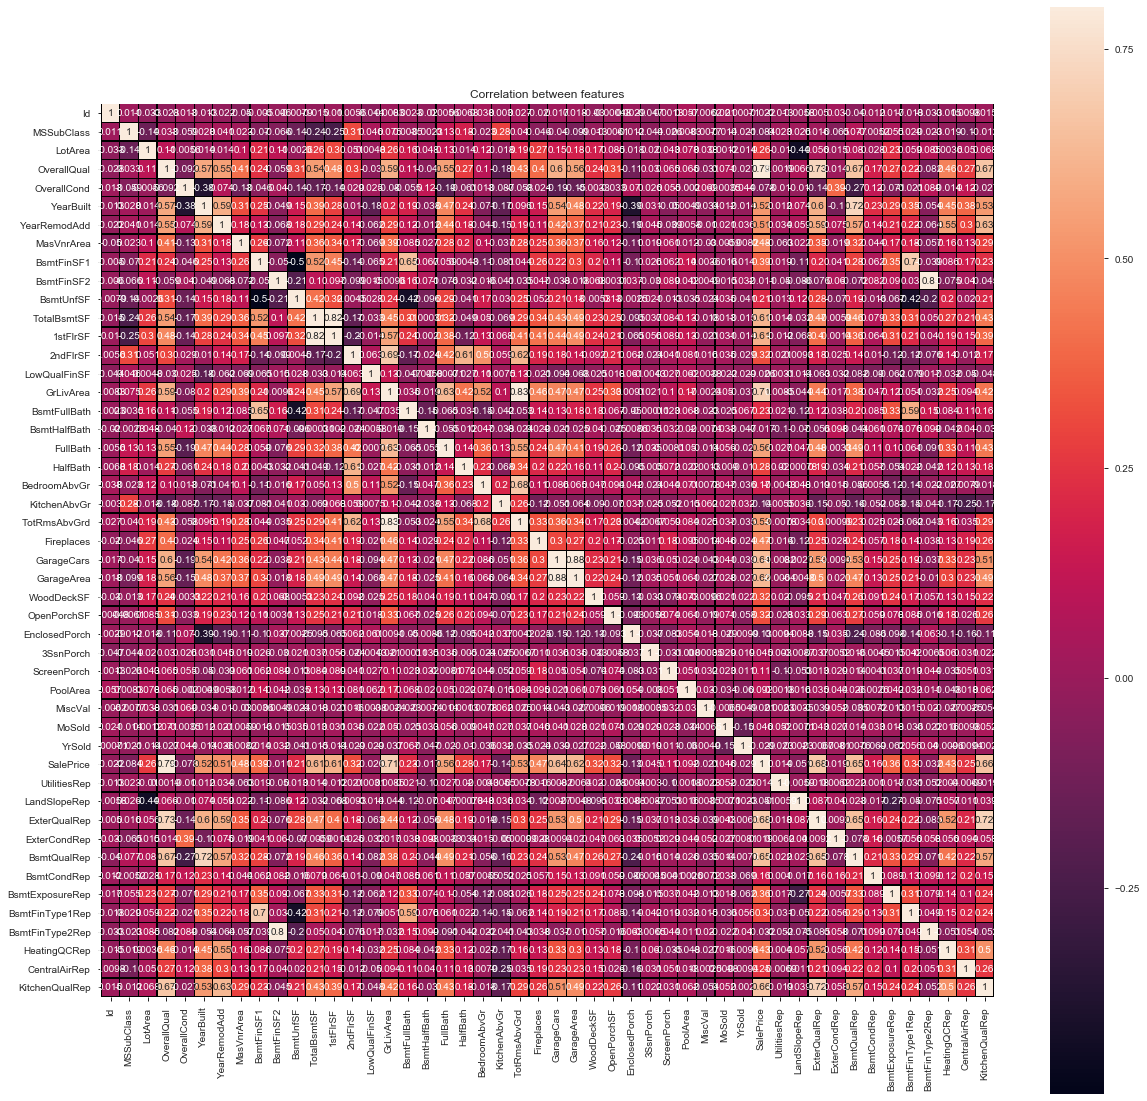

In [69]:
corr = train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,vmax=.8,linewidth=.01,square=True,annot=True,linecolor='black')
plt.title('Correlation between features')

## 5. Linear Regression

### 5.1  Preparing X and y using pandas

- __Combine__ both train and test data

In [70]:
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

In [71]:
train["SalePrice"] = np.log1p(train["SalePrice"])
y = train['SalePrice'].reset_index(drop=True)

In [72]:
train_features = train.drop(['SalePrice'], axis=1)
test_features = test
features = pd.concat([train_features, test_features]).reset_index(drop=True)

In [73]:
features.shape

(2919, 46)

- __Standardize__ features by removing the _mean_ and scaling to _unit standard deviation_.

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features)
features1 = scaler.transform(features)

In [75]:
features = pd.DataFrame(features1)
features.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.067331,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.525222,0.580909,-0.293136,-0.934857,...,1.039805,-0.230047,0.631705,-0.009441,-0.627142,1.139592,-0.323051,0.885619,0.26829,0.738935
1,-0.873616,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.572230,1.178114,-0.293136,-0.629891,...,-0.683756,-0.230047,0.631705,-0.009441,2.258765,0.656585,-0.323051,0.885619,0.26829,-0.771535
2,0.067331,0.137197,0.646183,-0.507284,0.980221,0.848965,0.334848,0.097875,-0.293136,-0.288511,...,1.039805,-0.230047,0.631705,-0.009441,0.334827,1.139592,-0.323051,0.885619,0.26829,0.738935
3,0.302568,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.572230,-0.494939,-0.293136,-0.047269,...,-0.683756,-0.230047,-0.806631,3.435397,-0.627142,0.656585,-0.323051,-0.158453,0.26829,0.738935
4,0.067331,0.518903,1.355551,-0.507284,0.947203,0.753229,1.387505,0.468933,-0.293136,-0.161063,...,1.039805,-0.230047,0.631705,-0.009441,1.296796,1.139592,-0.323051,0.885619,0.26829,0.738935


In [76]:
features.columns = ['MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
                 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
                 'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea',
                 'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold',
                 'UtilitiesRep','LandSlopeRep','ExterQualRep','ExterCondRep','BsmtQualRep','BsmtCondRep','BsmtExposureRep',
                 'BsmtFinType1Rep','BsmtFinType2Rep','HeatingQCRep','CentralAirRep','KitchenQualRep']
features.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,ExterQualRep,ExterCondRep,BsmtQualRep,BsmtCondRep,BsmtExposureRep,BsmtFinType1Rep,BsmtFinType2Rep,HeatingQCRep,CentralAirRep,KitchenQualRep
0,0.067331,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.525222,0.580909,-0.293136,-0.934857,...,1.039805,-0.230047,0.631705,-0.009441,-0.627142,1.139592,-0.323051,0.885619,0.26829,0.738935
1,-0.873616,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.572230,1.178114,-0.293136,-0.629891,...,-0.683756,-0.230047,0.631705,-0.009441,2.258765,0.656585,-0.323051,0.885619,0.26829,-0.771535
2,0.067331,0.137197,0.646183,-0.507284,0.980221,0.848965,0.334848,0.097875,-0.293136,-0.288511,...,1.039805,-0.230047,0.631705,-0.009441,0.334827,1.139592,-0.323051,0.885619,0.26829,0.738935
3,0.302568,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.572230,-0.494939,-0.293136,-0.047269,...,-0.683756,-0.230047,-0.806631,3.435397,-0.627142,0.656585,-0.323051,-0.158453,0.26829,0.738935
4,0.067331,0.518903,1.355551,-0.507284,0.947203,0.753229,1.387505,0.468933,-0.293136,-0.161063,...,1.039805,-0.230047,0.631705,-0.009441,1.296796,1.139592,-0.323051,0.885619,0.26829,0.738935


In [77]:
X = features.iloc[:len(y), :]
X_sub = features.iloc[len(y):, :]
X.shape, y.shape, X_sub.shape

((1460, 46), (1460,), (1459, 46))

### 5.2 Splitting X and y into training and test datasets

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [79]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (1168, 46)
y_train shape:  (1168,)

Test cases as below
X_test shape:  (292, 46)
y_test shape:  (292,)


### 5.3 Linear regression in scikit-learn

In [80]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 5.4  Interpreting Model Coefficients

In [81]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)

Intercept: 12.017535636991624
Coefficients: [-2.57425814e-02  1.52535471e-02  1.00968810e-01  5.10693527e-02
  5.47842167e-02  7.89020584e-03 -1.17093987e-03 -1.68330705e+10
 -6.25149792e+09 -1.62394510e+10  1.62846211e+10  2.82368359e+11
  3.08520454e+11  3.33900647e+10 -3.64186069e+11  2.32503762e-02
  3.64018420e-03  2.31727558e-02  1.52199212e-02  1.29556187e-02
 -7.70258951e-03  2.42941092e-02  2.96192092e-02  4.83447540e-02
  1.01563584e-02  1.62777235e-02 -3.57558891e-04  1.55848137e-02
  4.05502500e-03  2.03988970e-02 -1.78229191e-02 -8.00899798e-04
  3.75545346e-03 -9.34773895e-03  4.61178070e-03 -9.45471184e-04
  1.51911790e-02 -6.50632531e-03  2.63637520e-02  3.12696292e-03
  1.49005715e-02  2.77294432e-02 -3.27023954e-03  1.65482919e-02
  1.23753830e-02  1.49089272e-02]


### 5.5 Using the Model for Prediction

In [83]:
y_pred_train = linreg.predict(X_train)

In [84]:
y_pred_test = linreg.predict(X_test)

- We need an evaluation metric in order to compare our predictions with the actual values.

## 6. Model Evaluation

__Error__ is the deviation of the values predicted by the model with the true values

- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

### 6.1 Model Evaluation using metrics

- __Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors

In [85]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [86]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.09658858741543835
MAE for test set is 0.09567334235400782


- __Mean Squared Error__ (MSE) is the mean of the squared errors

In [87]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [88]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.020086549957059167
MSE for test set is 0.01872400900888421


- __Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors

In [89]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [90]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.14172702620551653
RMSE for test set is 0.13683570078340013


### 6.2 Model Evaluation using Rsquared value

In [91]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8707958155423605 0.8654939489187643


In [92]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8921138209828785 0.8718576404327251


- __Predict Submission__

In [93]:
submission = pd.read_csv("https://raw.githubusercontent.com/PrabhakarAlagarsamy/machine-learning/master/Data/house-prices/sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(linreg.predict(X_sub)))

In [94]:
submission.to_csv("submission.csv", index=False)